# Problem Statement
Movie production house want to know what people will look at first glance regardless of genre in the movie. Thousands of movie reviews were collected as in 30 reviews per movie, 50-50% positive-negative to get insight.

Original dataset link:
http://ai.stanford.edu/~amaas/data/sentiment/

Preprocessed dataset link: 
https://www.kaggle.com/nisargchodavadiya/imdb-movie-reviews-with-ratings-50k


1.   Sentiment Analysis Model
2.   More Insights on Review

# 1. Sentiment Analysis Model

## Loading Dataset

In [ ]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Labeled Reviews
imdb_sup_df = pd.read_csv('/content/drive/MyDrive/Data Science/My Case Studies/IMDB2/imdb_sup.csv')

# Unlabeled Reviews
# imdb_unsup_df = pd.read_csv('/content/drive/MyDrive/Data Science/My Case Studies/IMDB2/imdb_unsup.csv')

In [ ]:
imdb_sup_df

,Review,Rating,Sentiment
0,"Kurt Russell's chameleon-like performance, cou...",10,1
1,It was extremely low budget(it some scenes it ...,8,1
2,James Cagney is best known for his tough chara...,8,1
3,"Following the brilliant ""Goyôkiba"" (aka. ""Hanz...",8,1
4,One of the last classics of the French New Wav...,10,1
...,...,...,...
49995,(spoiler) it could be the one the worst movie ...,4,0
49996,"So, you've seen the Romero movies, yes? And yo...",1,0
49997,Just listen to the Broadway cast album and to ...,3,0
49998,I have been a fan of the Carpenters for a long...,3,0


## Data Cleaning

Define finction which can clean text of review

In [ ]:
def text_clean(message):
  '''
  message = "#'This', is $string #with punction, <br /> @'html_tag' and actual message also!"

  return 'string punction html_tag actual message also'
  '''

  html_tag = '<br />'
  message = message.replace(html_tag,'')  # remove html tag
  message = re.sub(r'[^\w\s]', '', message)   # remove punctiation
  message = message.lower()
  message = [word for word in message.split() if word not in stopwords.words('english')]
  message = ' '.join(message)

  return message

In [ ]:
test_str = "#'This', is $string #with punction, <br /> @'html_tag' and actual message also!"
text_clean(test_str)

'string punction html_tag actual message also'

Text cleaning of all reviews

In [ ]:
# this cell will take around 15-20 min

imdb_sup_df['Review'] = imdb_sup_df['Review'].apply(text_clean)

In [ ]:
imdb_sup_df

,Review,Rating,Sentiment
0,kurt russells chameleonlike performance couple...,10,1
1,extremely low budgetit scenes looks like recor...,8,1
2,james cagney best known tough characters gangs...,8,1
3,following brilliant goyôkiba aka hanzo razor s...,8,1
4,one last classics french new wave direction ci...,10,1
...,...,...,...
49995,spoiler could one worst movie see might like l...,4,0
49996,youve seen romero movies yes youve seen jacobs...,1,0
49997,listen broadway cast album voices barbara harr...,3,0
49998,fan carpenters long time read biography watche...,3,0


## Stemmer

In [ ]:
from nltk.stem.porter import PorterStemmer

porterstemmer = PorterStemmer()

def steming(message):
  return[porterstemmer.stem(word) for word in message.split()]

## TF-IDF Vectors

In [ ]:
# 1-2 minute
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=steming) # here stemming is our user defined function as above 

X = tfidf.fit_transform(imdb_sup_df['Review'])
y = imdb_sup_df['Sentiment'].values

## LogisticRegression Classifier

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.5, shuffle=True)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
# Classification score in train data
clf.score(X_train, y_train)

0.93316

In [ ]:
# Classification score in test data
clf.score(X_test, y_test)

0.88744

In [ ]:
# Prediction on train data
ypred = clf.predict(X_train)
ypred

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
# Prediction on test data
yhat = clf.predict(X_test)
yhat

array([1, 0, 1, ..., 1, 0, 1])

## Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
Normalized confusion matrix
Confusion matrix, without normalization
Normalized confusion matrix


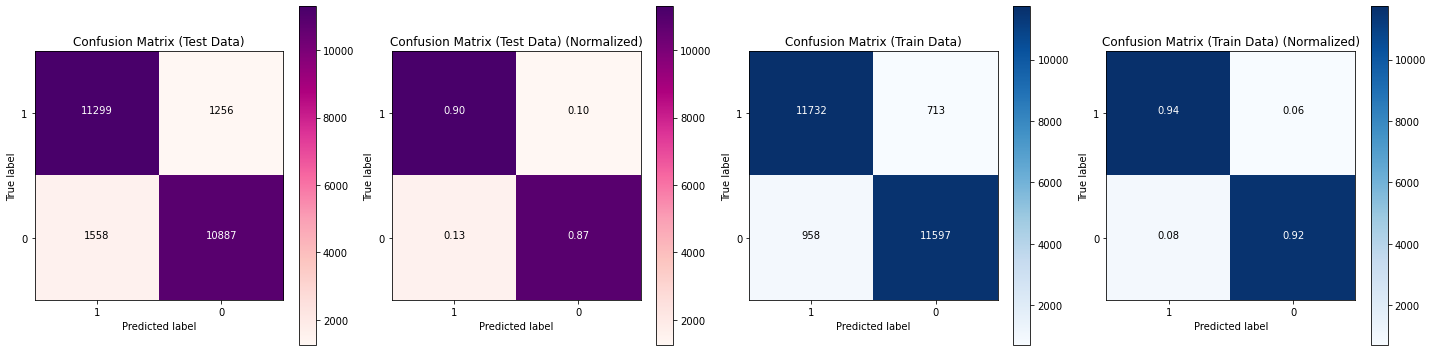

In [ ]:
cm = confusion_matrix(y_test, yhat, labels=[1,0])
cm2 = confusion_matrix(y_train, ypred, labels=[1,0])

plt.figure(figsize=(20,5))
plt.subplot(141)
plot_confusion_matrix(cm, classes=[1,0], normalize= False, title='Confusion Matrix (Test Data)', cmap='RdPu')
plt.subplot(142)
plot_confusion_matrix(cm, classes=[1,0], normalize= True, title='Confusion Matrix (Test Data) (Normalized)', cmap='RdPu')
plt.subplot(143)
plot_confusion_matrix(cm2, classes=[1,0], normalize= False, title='Confusion Matrix (Train Data)')
plt.subplot(144)
plot_confusion_matrix(cm2, classes=[1,0], normalize= True, title='Confusion Matrix (Train Data) (Normalized)')

# 2. More Insights on Review

In [ ]:
from wordcloud import WordCloud

In [ ]:
# Prepocess positive reviews by join all as one single string
imdb_train_pos_df = imdb_sup_df.loc[imdb_sup_df['Rating']>5]
pos_sentences = imdb_train_pos_df['Review'].tolist()
one_string_pos = ' '.join(pos_sentences)

# Prepocess negative reviews by join all as one single string
imdb_train_neg_df = imdb_sup_df.loc[imdb_sup_df['Rating']<5]
neg_sentences = imdb_train_neg_df['Review'].tolist()
one_string_neg = ' '.join(neg_sentences)

In [ ]:
stop = stopwords.words('english')

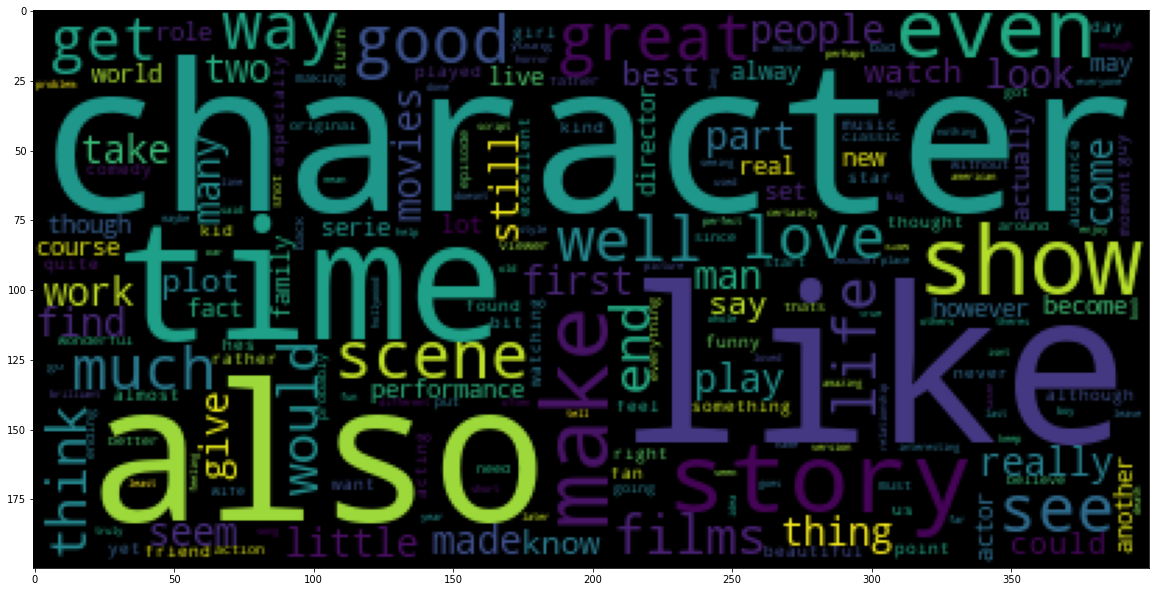

In [ ]:
plt.figure(figsize=(20,20))
stop.append('movie')
stop.append('film')
stop.append('one')
plt.imshow(WordCloud(stopwords=stop).generate(one_string_pos))

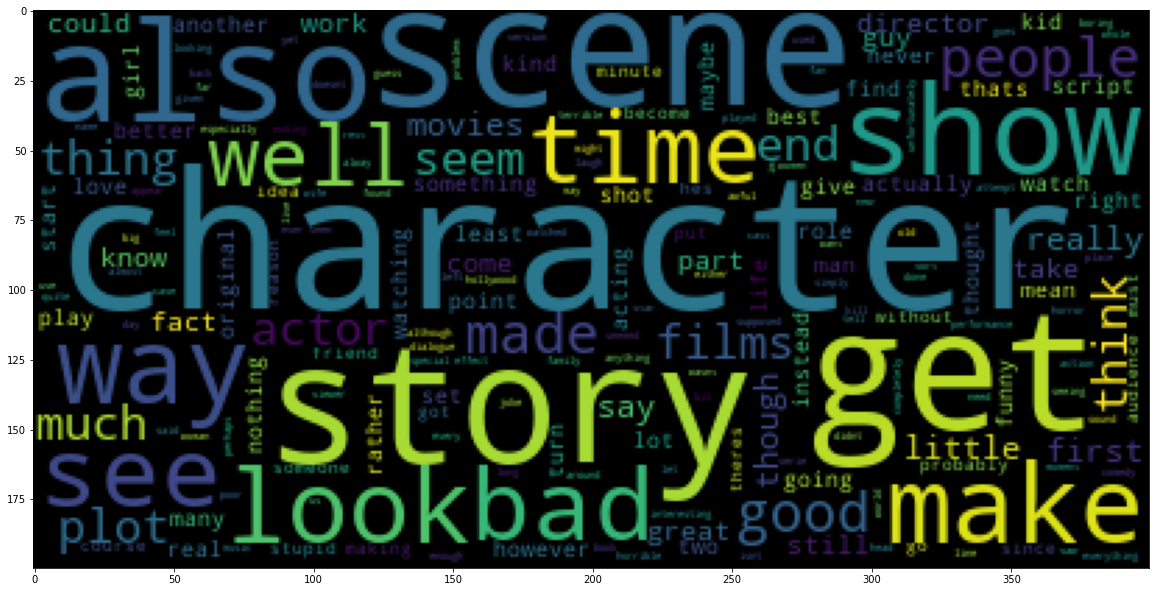

In [ ]:
# Word cloud for negative sentences
plt.figure(figsize=(20,20))
stop.append('like')
stop.append('even')
stop.append('would')
plt.imshow(WordCloud(stopwords=stop).generate(one_string_neg))

# Conclusion

## Sentiment analysis
Logistic regression model without tuning hyperparameter, got accuracy of **88%** on test data.

## Word Cloud
*   People look at the character, story in the movie at first glance.
*   Then they looked at the scene.
*   Many times the story, scene makes the movie bad when the movie gets low ratings.</br>
Note: This dataset was published in 2011 so today’s reviews may make a difference in the answer to this question.
---